# TeleChurn Predictor: Exploratory Data Analysis

This notebook performs initial exploratory data analysis on telecom customer data for the TeleChurn Predictor project. The goal is to understand the data structure, identify patterns, and gain insights that will inform feature engineering and model development.

## Project Overview

TeleChurn Predictor is a machine learning system designed to predict customer churn in the telecommunications industry. This notebook is the first step in the data science pipeline, focusing on understanding the raw data before preprocessing and modeling.

## Contents

1. [Data Loading and Initial Inspection](#1.-Data-Loading-and-Initial-Inspection)
2. [Summary Statistics and Data Types](#2.-Summary-Statistics-and-Data-Types)
3. [Missing Value Analysis](#3.-Missing-Value-Analysis)
4. [Distribution of Numerical Features](#4.-Distribution-of-Numerical-Features)
5. [Analysis of Categorical Features](#5.-Analysis-of-Categorical-Features)
6. [Target Variable Analysis](#6.-Target-Variable-Analysis)
7. [Correlation Analysis](#7.-Correlation-Analysis)
8. [Outlier Detection](#8.-Outlier-Detection)
9. [Feature Importance Analysis](#9.-Feature-Importance-Analysis)
10. [Conclusions and Next Steps](#10.-Conclusions-and-Next-Steps)

## Setup

Let's import the necessary libraries and set up the environment.

In [1]:
# Install required libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn scipy missingno

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
import warnings

# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

# Ignore warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Data Loading and Initial Inspection

Let's load the telecom customer data and perform an initial inspection.

In [3]:
# Define file paths
train_path = "../data/raw/cell2celltrain.csv"
holdout_path = "../data/raw/cell2cellholdout.csv"

# Load data
train_data = pd.read_csv(train_path)
holdout_data = pd.read_csv(holdout_path)

print(f"Training data shape: {train_data.shape}")
print(f"Holdout data shape: {holdout_data.shape}")

Training data shape: (51047, 58)
Holdout data shape: (20000, 58)


In [4]:
# Display the first few rows of the training data
train_data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.00,22.00,0.25,0.00,0.00,-157.00,-19.00,0.70,0.70,6.30,0.00,0.00,97.20,0.00,0.00,58.00,24.00,1.30,0.00,0.30,61,2,1,SEAPOR503,2.00,2.00,361.00,62.00,0.00,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.00,17.00,0.00,0.00,0.00,-4.00,0.00,0.30,0.00,2.70,0.00,0.00,0.00,0.00,0.00,5.00,1.00,0.30,0.00,0.00,58,1,1,PITHOM412,2.00,1.00,1504.00,40.00,42.00,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.00,38.00,0.00,0.00,0.00,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.30,0.00,1.30,3.70,0.00,0.00,0.00,60,1,1,MILMIL414,1.00,1.00,1812.00,26.00,26.00,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.00,75.00,1.24,0.00,0.00,157.00,8.10,52.00,7.70,76.00,4.30,1.30,200.30,370.30,147.00,555.70,303.70,59.70,0.00,22.70,59,2,2,PITHOM412,9.00,4.00,458.00,30.00,0.00,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.00,17.00,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53,2,2,OKCTUL918,4.00,3.00,852.00,46.00,54.00,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
# Display the first few rows of the holdout data
holdout_data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.00,37.00,0.25,23.00,0.00,532.00,51.00,8.30,1.00,61.30,1.70,0.30,55.30,46.30,6.30,83.70,157.00,9.30,0.00,5.70,56,1,1,MILMIL414,7,6,240,30.00,0.00,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.00,72.00,0.00,0.00,0.00,38.00,0.00,9.70,0.70,77.00,8.70,0.00,106.30,14.70,0.70,97.30,90.30,10.30,0.00,0.00,57,1,1,NNYSYR315,6,4,434,56.00,0.00,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.00,50.00,4.95,420.00,0.00,198.00,23.30,12.70,3.00,176.00,11.30,0.30,213.90,103.30,0.30,238.30,192.30,15.70,0.00,4.00,55,1,1,MILMIL414,3,3,700,38.00,24.00,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.00,30.00,0.00,16.00,0.00,30.00,7.30,2.00,0.70,17.30,0.00,0.00,33.10,8.00,4.70,48.30,7.00,2.70,0.00,0.30,59,3,2,SLCSLC801,6,5,48,46.00,0.00,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.00,50.00,0.74,0.00,1.30,169.00,1.00,2.70,6.00,43.70,4.30,0.00,490.10,50.70,8.30,189.30,105.00,8.70,0.00,4.30,52,1,1,OKCTUL918,4,4,408,58.00,0.00,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No


### Check for duplicates

In [6]:
# Check for duplicate rows in training data
print(f"Number of duplicate rows in training data: {train_data.duplicated().sum()}")

# Check for duplicate CustomerIDs in training data
print(f"Number of duplicate CustomerIDs in training data: {train_data['CustomerID'].duplicated().sum()}")

Number of duplicate rows in training data: 0
Number of duplicate CustomerIDs in training data: 0


## 2. Summary Statistics and Data Types

Let's examine the data types and summary statistics of our dataset.

In [7]:
# Display data types
train_data.dtypes.sort_values()

CustomerID                     int64
AdjustmentsToCreditRating      int64
IncomeGroup                    int64
ReferralsMadeBySubscriber      int64
RetentionOffersAccepted        int64
RetentionCalls                 int64
MonthsInService                int64
ActiveSubs                     int64
UniqueSubs                     int64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
CurrentEquipmentDays         float64
OffPeakCallsInOut            float64
AgeHH1                       float64
AgeHH2                       float64
Handsets                     float64
PeakCallsInOut               float64
HandsetModels                float64
OutboundCalls                float64
InboundCalls                 float64
MonthlyMinutes               float64
MonthlyRevenue               float64
OverageMinutes               float64
TotalRecurringCharge         float64
PercChangeMinutes            float64
PercChangeRevenues           float64
R

In [8]:
# Summary statistics for numerical columns
train_data.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.00,3201956.88,116905.56,3000002.00,3100632.00,3201534.00,3305376.00,3399994.00
MonthlyMinutes,50891.00,525.65,529.87,0.00,158.00,366.00,723.00,7359.00
CurrentEquipmentDays,51046.00,380.55,253.80,-5.00,205.00,329.00,515.00,1812.00
ReceivedCalls,51047.00,114.80,166.49,0.00,8.30,52.80,153.50,2692.40
PeakCallsInOut,51047.00,90.55,104.95,0.00,23.00,62.00,121.30,2090.70
OffPeakCallsInOut,51047.00,67.65,92.75,0.00,11.00,35.70,88.70,1474.70
MonthlyRevenue,50891.00,58.83,44.51,-6.17,33.61,48.46,71.06,1223.38
TotalRecurringCharge,50891.00,46.83,23.85,-11.00,30.00,45.00,60.00,400.00
OverageMinutes,50891.00,40.03,96.59,0.00,0.00,3.00,41.00,4321.00
AgeHH1,50138.00,31.34,22.09,0.00,0.00,36.00,48.00,99.00


In [9]:
# Summary statistics for categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"\n{column}:")
    print(train_data[column].value_counts(normalize=True).head(10) * 100)


Churn:
Churn
No    71.18
Yes   28.82
Name: proportion, dtype: float64

ServiceArea:
ServiceArea
NYCBRO917   3.30
HOUHOU281   2.96
DALDAL214   2.94
NYCMAN917   2.32
APCFCH703   1.53
DALFTW817   1.53
SANSAN210   1.42
APCSIL301   1.31
SANAUS512   1.20
SFROAK510   1.19
Name: proportion, dtype: float64

ChildrenInHH:
ChildrenInHH
No    75.77
Yes   24.23
Name: proportion, dtype: float64

HandsetRefurbished:
HandsetRefurbished
No    86.11
Yes   13.89
Name: proportion, dtype: float64

HandsetWebCapable:
HandsetWebCapable
Yes   90.20
No     9.80
Name: proportion, dtype: float64

TruckOwner:
TruckOwner
No    81.34
Yes   18.66
Name: proportion, dtype: float64

RVOwner:
RVOwner
No    91.86
Yes    8.14
Name: proportion, dtype: float64

Homeownership:
Homeownership
Known     66.58
Unknown   33.42
Name: proportion, dtype: float64

BuysViaMailOrder:
BuysViaMailOrder
No    63.85
Yes   36.15
Name: proportion, dtype: float64

RespondsToMailOffers:
RespondsToMailOffers
No    62.34
Yes   37.66
Name: propo

### Categorize features

Let's categorize our features into different types for easier analysis.

In [10]:
# Categorize features
id_columns = ['CustomerID']
target_column = ['Churn']

# Categorical columns (non-binary, non-numeric)
categorical_columns = [
    'ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus'
]

# Binary columns (yes/no or similar)
binary_columns = [
    'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
    'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
    'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
    'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
    'MadeCallToRetentionTeam'
]

# Numerical columns (continuous)
numerical_continuous_columns = [
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
    'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
    'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
    'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
    'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
    'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
    'CallForwardingCalls', 'CallWaitingCalls', 'AgeHH1', 'AgeHH2'
]

# Numerical columns (discrete/integer)
numerical_discrete_columns = [
    'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets',
    'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls',
    'RetentionOffersAccepted', 'ReferralsMadeBySubscriber',
    'IncomeGroup', 'AdjustmentsToCreditRating', 'HandsetPrice'
]

# All numerical columns
numerical_columns = numerical_continuous_columns + numerical_discrete_columns

# Print counts
print(f"Total features: {len(train_data.columns)}")
print(f"ID columns: {len(id_columns)}")
print(f"Target column: {len(target_column)}")
print(f"Categorical columns: {len(categorical_columns)}")
print(f"Binary columns: {len(binary_columns)}")
print(f"Numerical continuous columns: {len(numerical_continuous_columns)}")
print(f"Numerical discrete columns: {len(numerical_discrete_columns)}")

Total features: 58
ID columns: 1
Target column: 1
Categorical columns: 5
Binary columns: 16
Numerical continuous columns: 23
Numerical discrete columns: 12


## 3. Missing Value Analysis

Let's analyze missing values in our dataset.

In [11]:
# Calculate missing values
missing = train_data.isnull().sum()
missing_percent = missing / len(train_data) * 100

# Create summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Missing Percentage': missing_percent
})

# Sort by missing percentage
missing_summary = missing_summary.sort_values('Missing Percentage', ascending=False)

# Display columns with missing values
missing_summary[missing_summary['Missing Values'] > 0]

,Missing Values,Missing Percentage
AgeHH2,909,1.78
AgeHH1,909,1.78
PercChangeMinutes,367,0.72
PercChangeRevenues,367,0.72
MonthlyRevenue,156,0.31
MonthlyMinutes,156,0.31
TotalRecurringCharge,156,0.31
DirectorAssistedCalls,156,0.31
OverageMinutes,156,0.31
RoamingCalls,156,0.31


<Figure size 1200x1000 with 0 Axes>

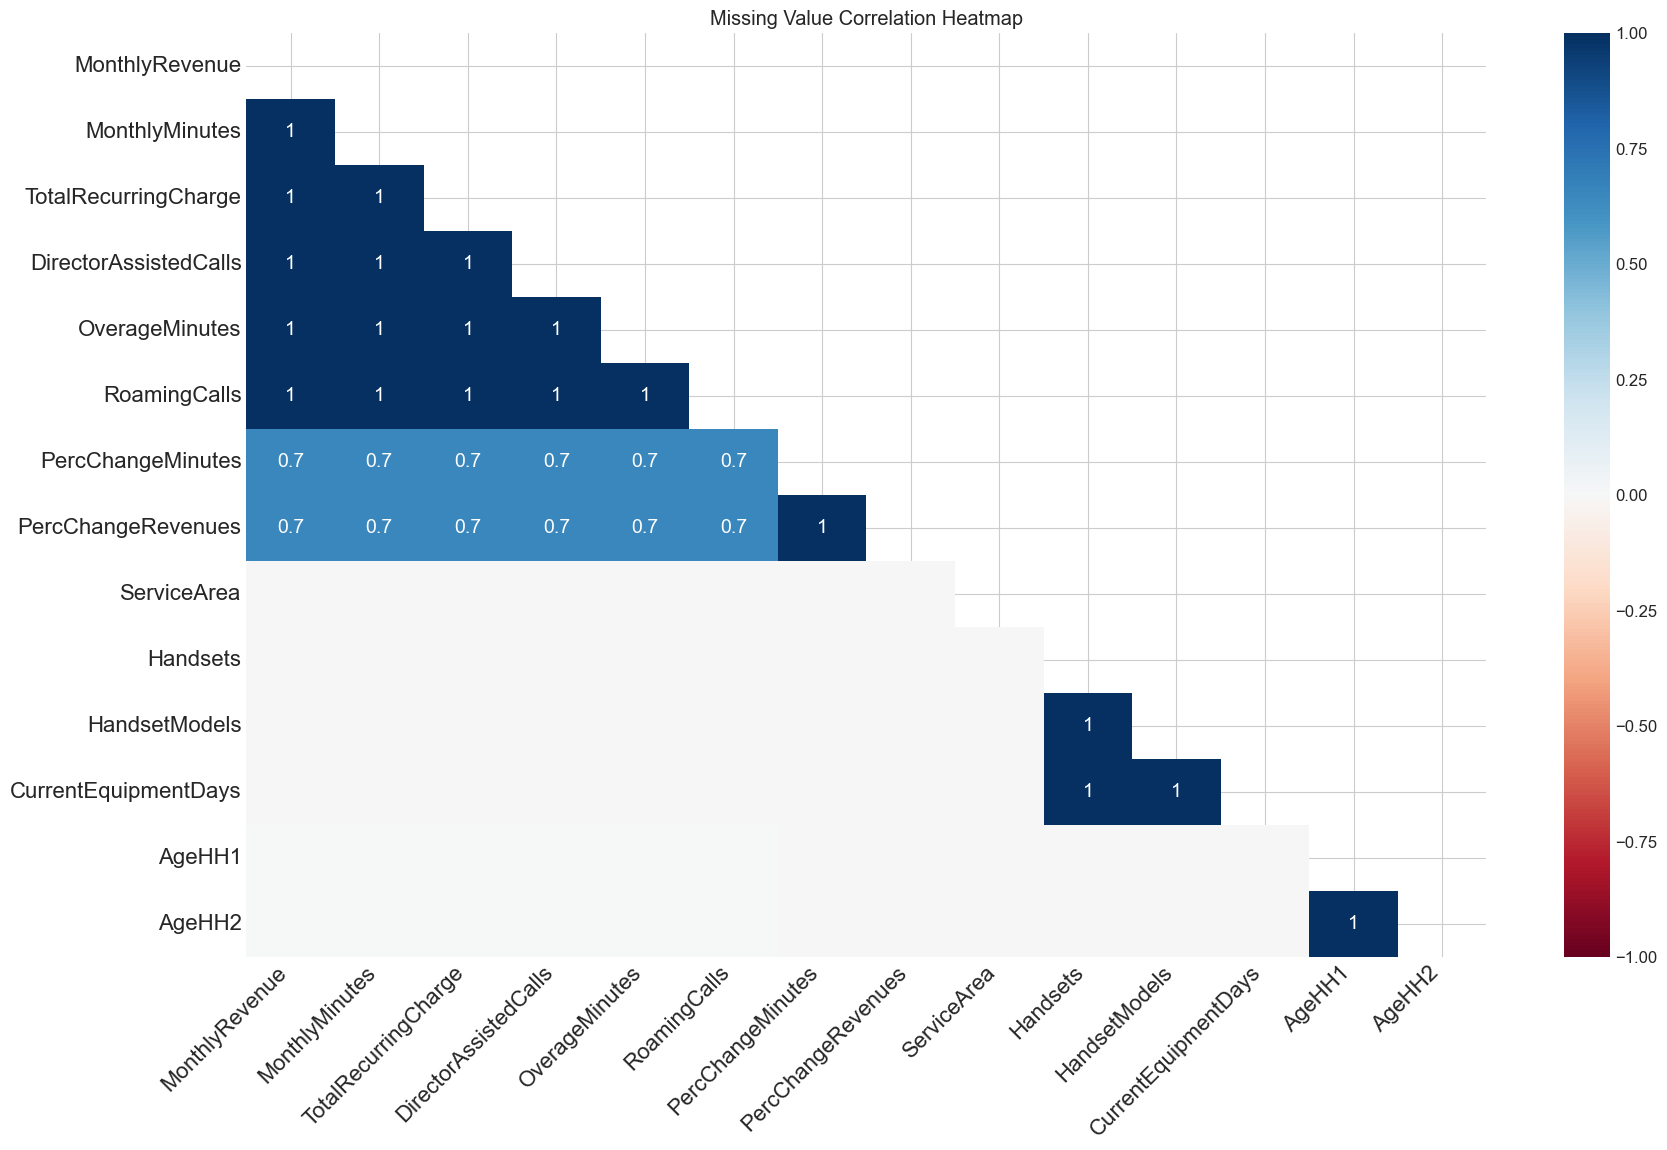

In [12]:
# Visualize missing value correlations
plt.figure(figsize=(12, 10))
msno.heatmap(train_data)
plt.title('Missing Value Correlation Heatmap')
plt.show()

## 4. Distribution of Numerical Features

Let's examine the distribution of numerical features.

In [13]:
# Function to plot histograms for numerical features
def plot_histograms(data, columns, bins=30, figsize=(16, 12), ncols=3):
    nrows = int(np.ceil(len(columns) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        if i < len(axes):
            sns.histplot(data[column], bins=bins, kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
    
    # Hide unused subplots
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

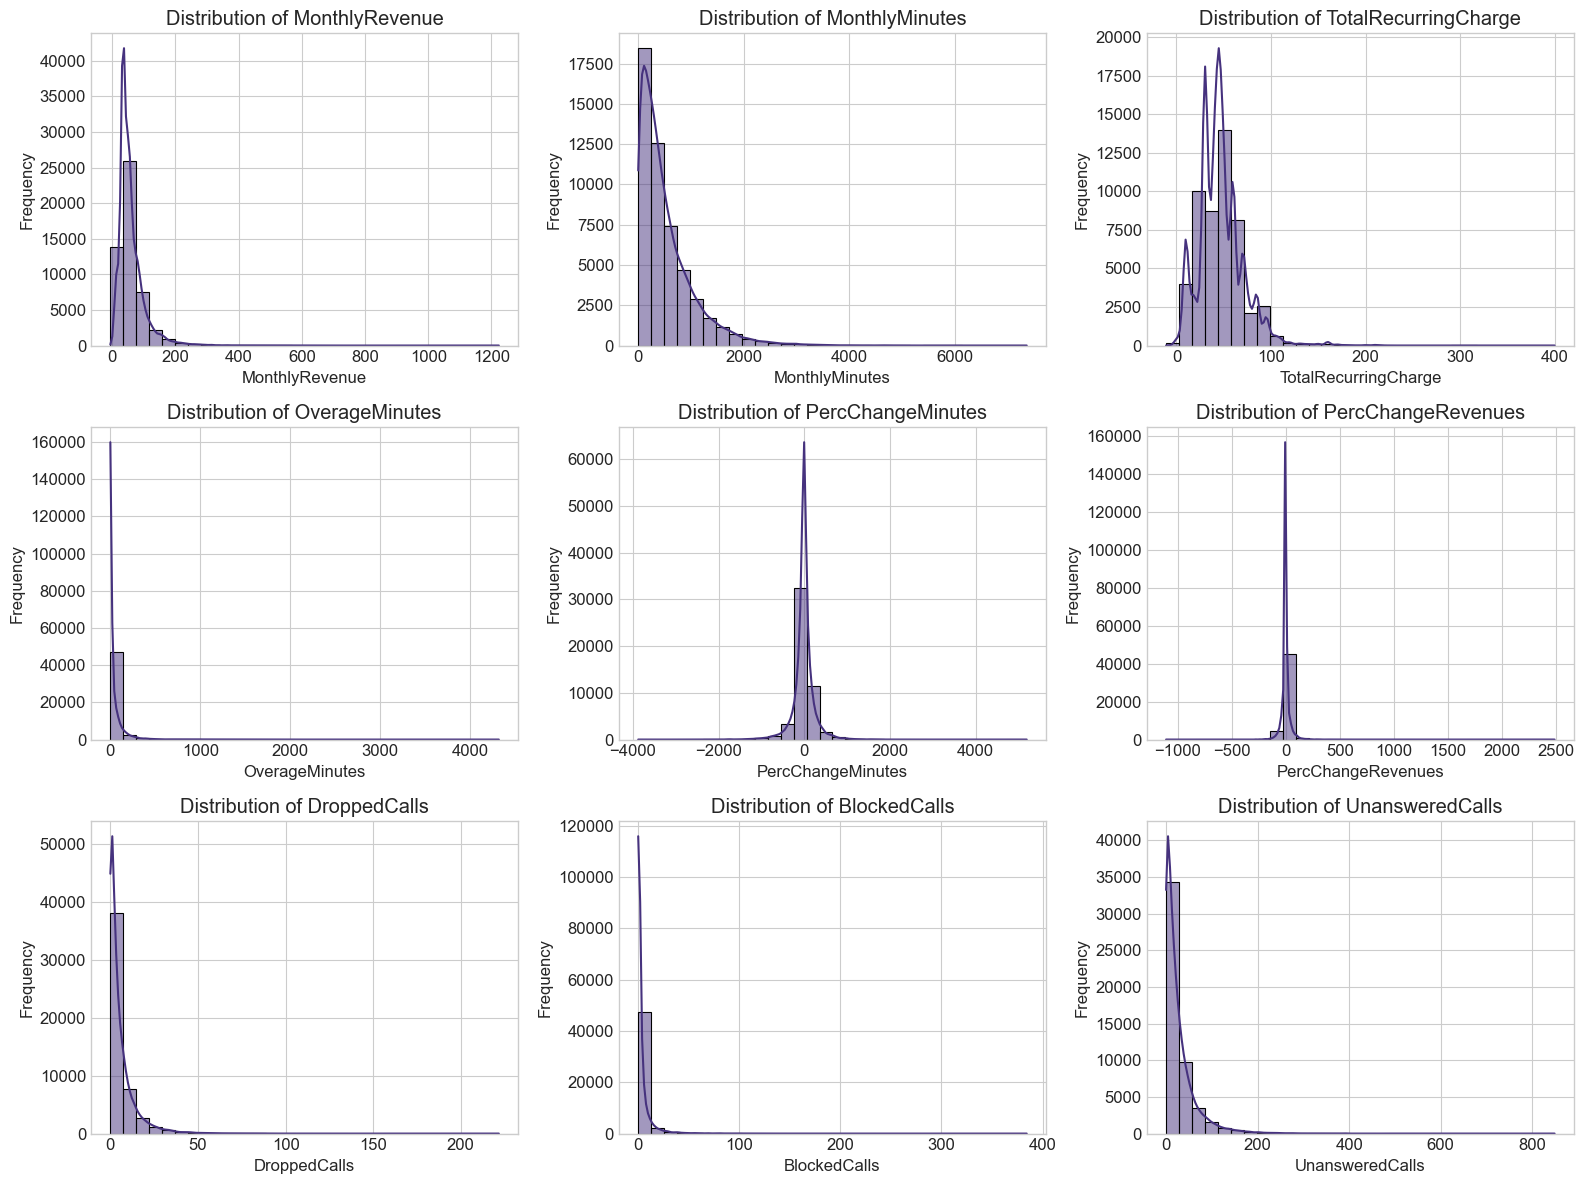

In [14]:
# Plot histograms for key numerical continuous features
key_continuous_features = [
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
    'OverageMinutes', 'PercChangeMinutes', 'PercChangeRevenues',
    'DroppedCalls', 'BlockedCalls', 'UnansweredCalls'
]

plot_histograms(train_data, key_continuous_features)

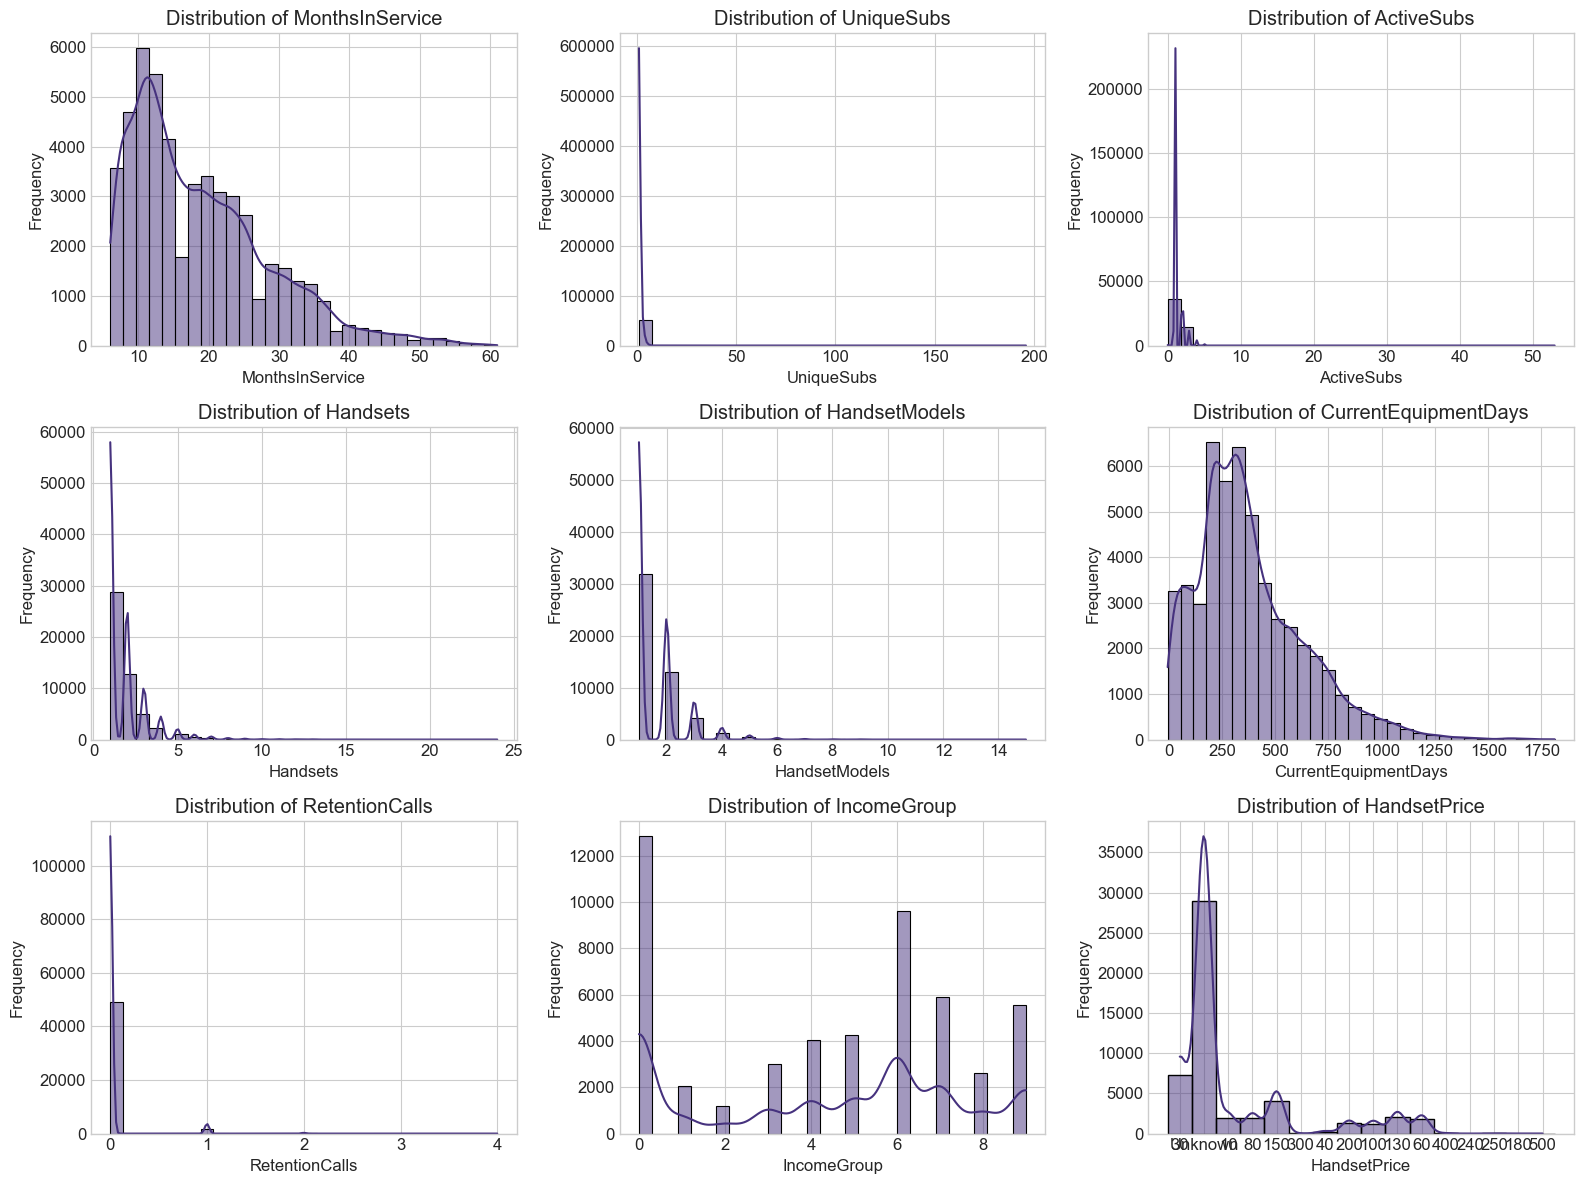

In [15]:
# Plot histograms for key numerical discrete features
key_discrete_features = [
    'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets',
    'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls',
    'IncomeGroup', 'HandsetPrice'
]

plot_histograms(train_data, key_discrete_features)

### Box plots for numerical features

Let's use box plots to identify potential outliers in our numerical features.

In [16]:
# Function to plot box plots for numerical features
def plot_boxplots(data, columns, figsize=(16, 12), ncols=3):
    nrows = int(np.ceil(len(columns) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        if i < len(axes):
            sns.boxplot(x=data[column], ax=axes[i])
            axes[i].set_title(f'Box Plot of {column}')
            axes[i].set_xlabel(column)
    
    # Hide unused subplots
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

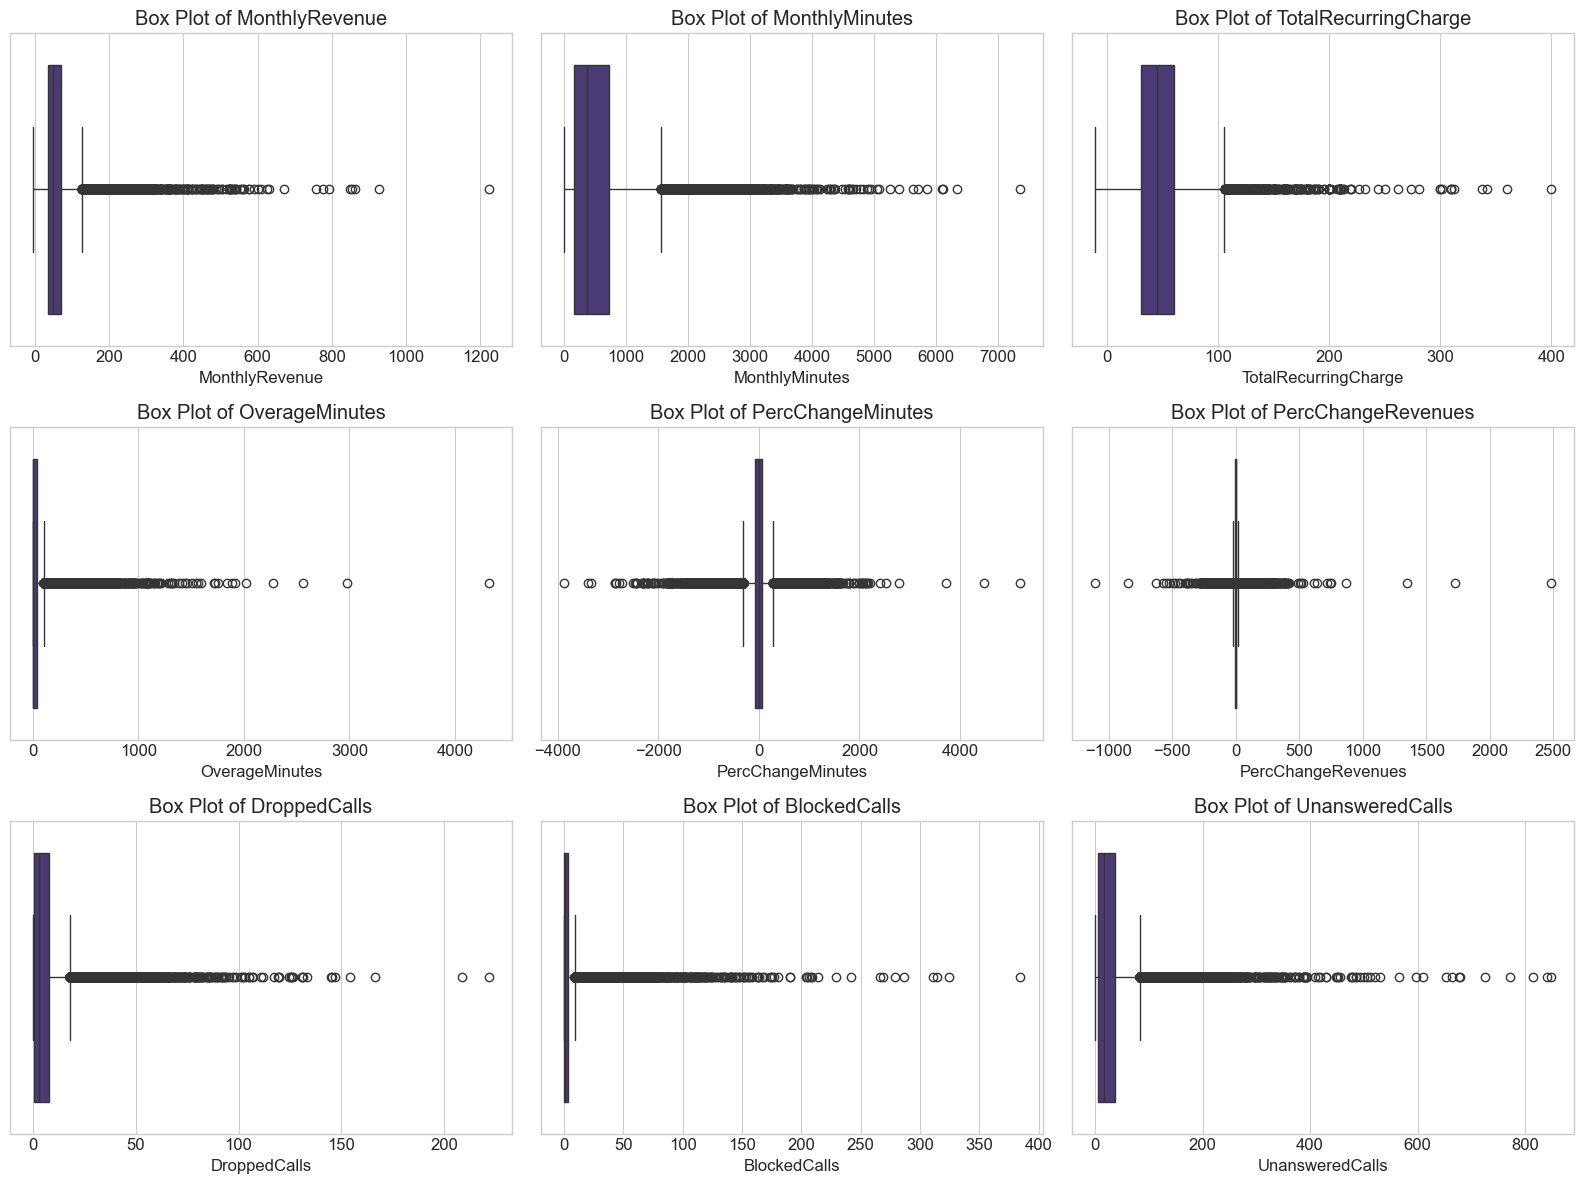

In [17]:
# Plot box plots for key numerical continuous features
plot_boxplots(train_data, key_continuous_features)

## 5. Analysis of Categorical Features

Let's examine the distribution of categorical features.

In [18]:
# Function to plot bar charts for categorical features
def plot_bar_charts(data, columns, figsize=(16, 12), ncols=2):
    nrows = int(np.ceil(len(columns) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        if i < len(axes):
            value_counts = data[column].value_counts().sort_values(ascending=False)
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
            axes[i].set_title(f'Distribution of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
    
    # Hide unused subplots
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

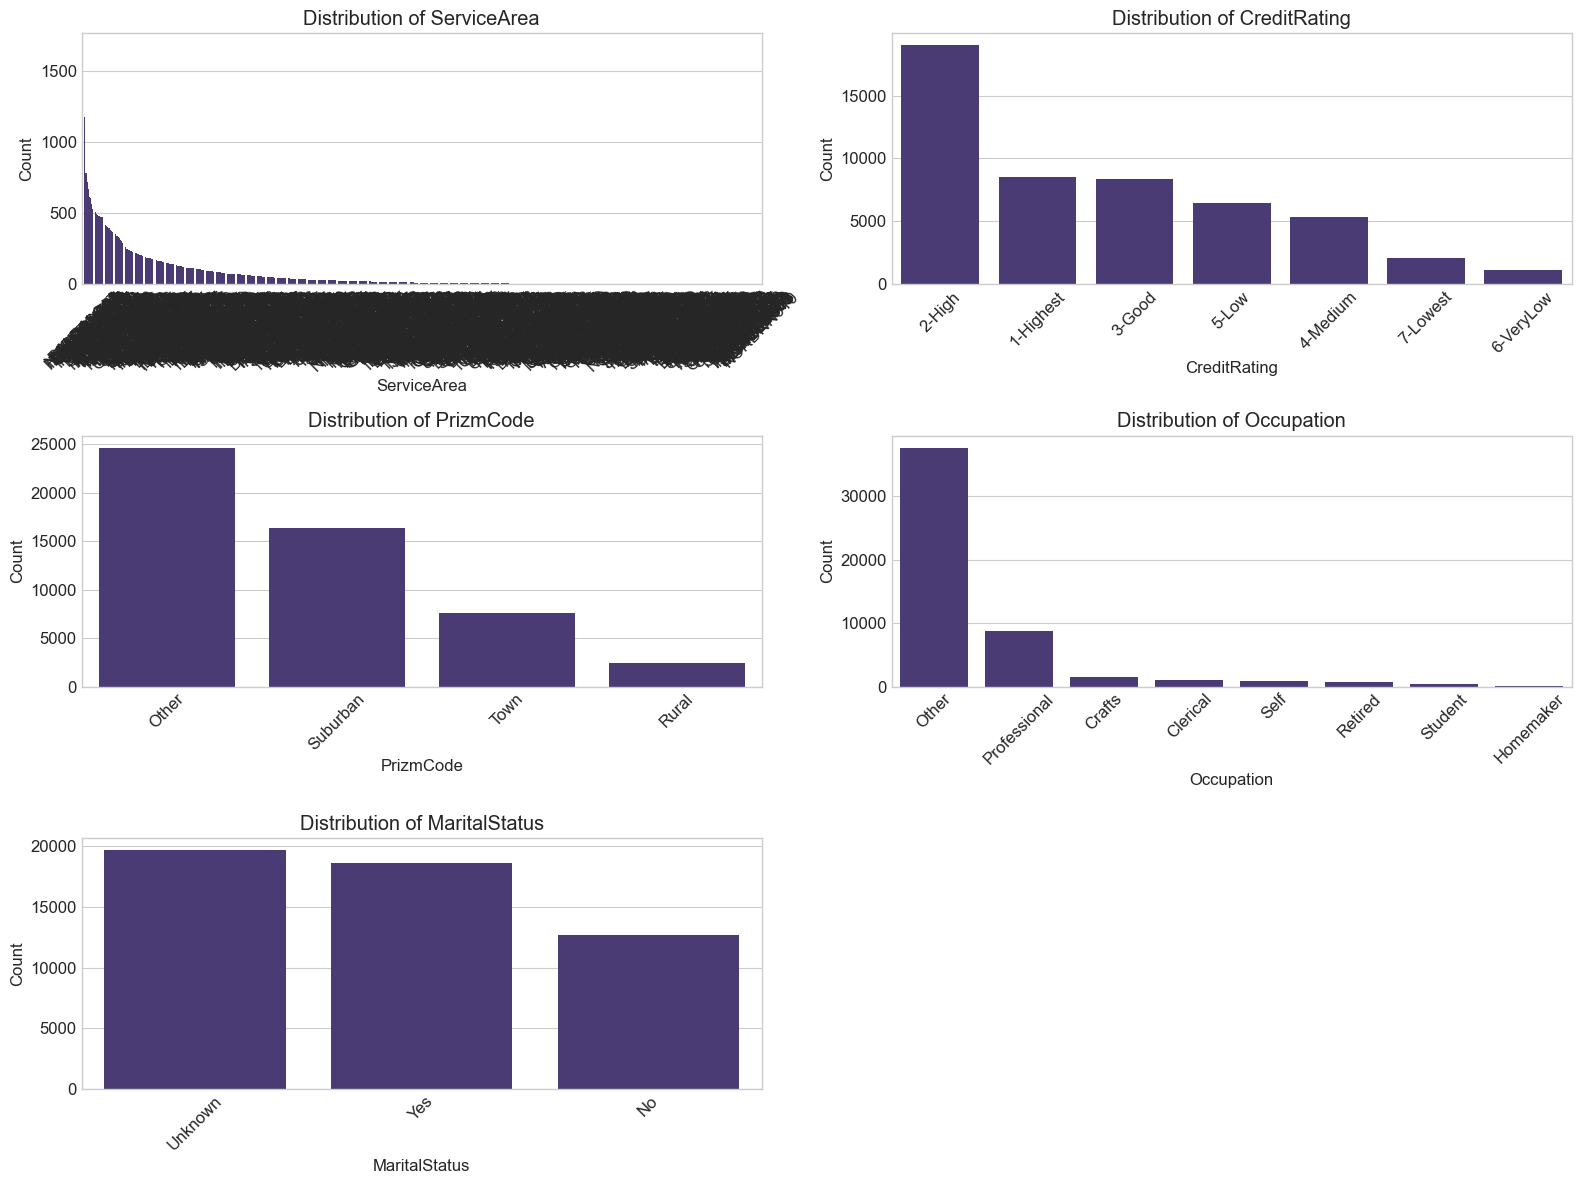

In [19]:
# Plot bar charts for categorical features
plot_bar_charts(train_data, categorical_columns)

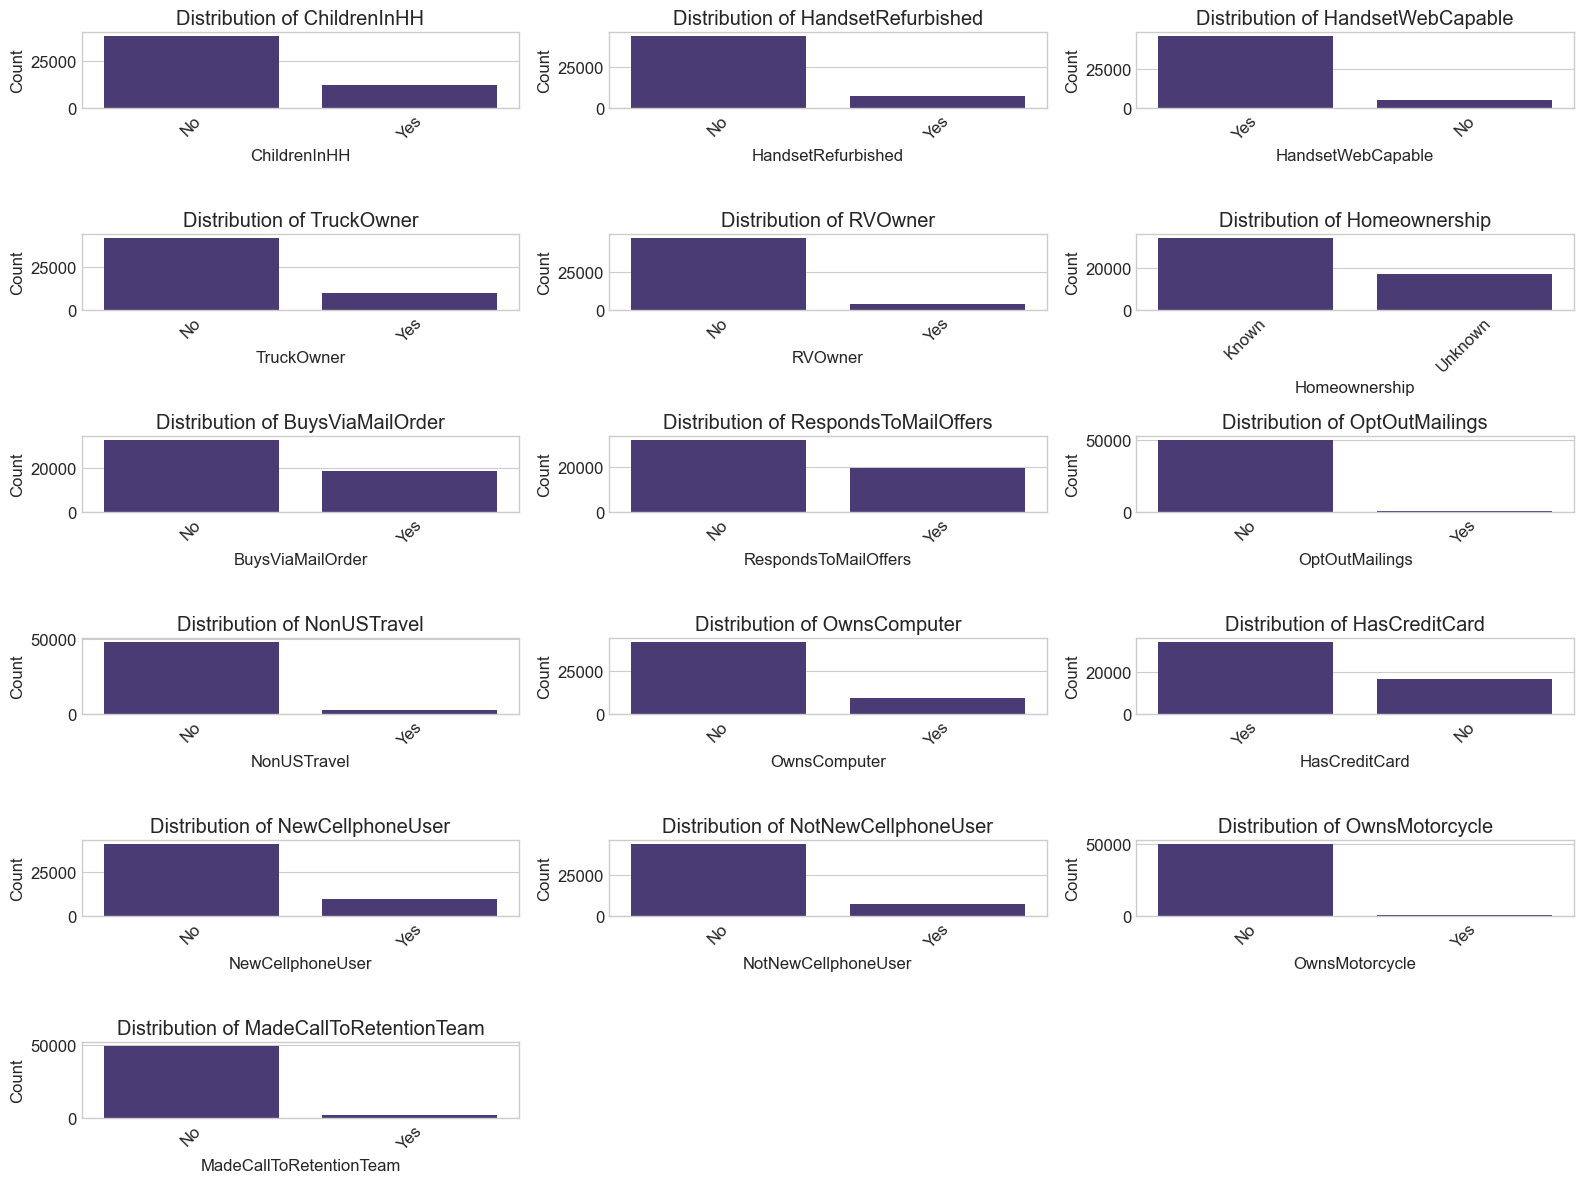

In [20]:
# Plot bar charts for binary features
plot_bar_charts(train_data, binary_columns, ncols=3)

## 6. Target Variable Analysis

Let's analyze the target variable (Churn) and its relationship with other features.

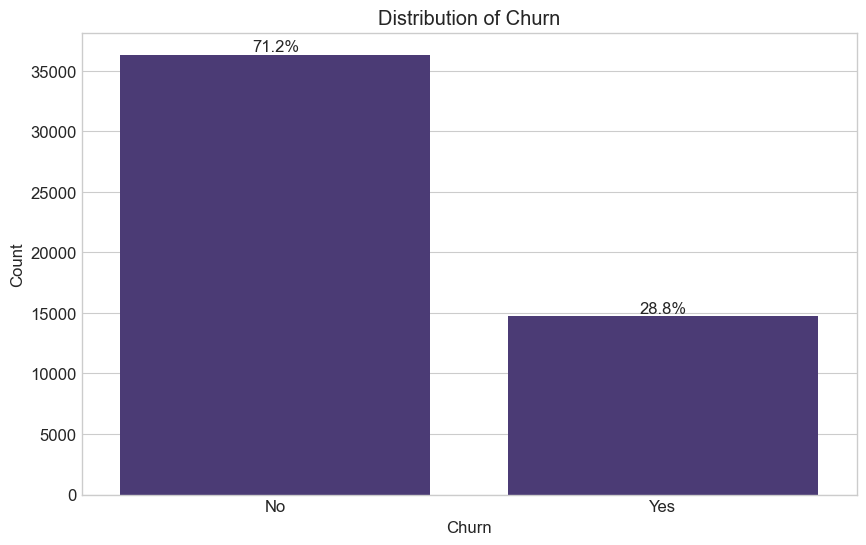

In [21]:
# Distribution of the target variable
churn_counts = train_data['Churn'].value_counts()
churn_percent = train_data['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Add percentage labels
for i, p in enumerate(ax.patches):
    ax.annotate(f"{churn_percent.values[i]:.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.show()

### Relationship between numerical features and churn

In [22]:
# Function to plot numerical features by churn
def plot_numerical_by_churn(data, columns, figsize=(16, 12), ncols=3):
    nrows = int(np.ceil(len(columns) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        if i < len(axes):
            sns.boxplot(x='Churn', y=column, data=data, ax=axes[i])
            axes[i].set_title(f'{column} by Churn')
            axes[i].set_xlabel('Churn')
            axes[i].set_ylabel(column)
    
    # Hide unused subplots
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

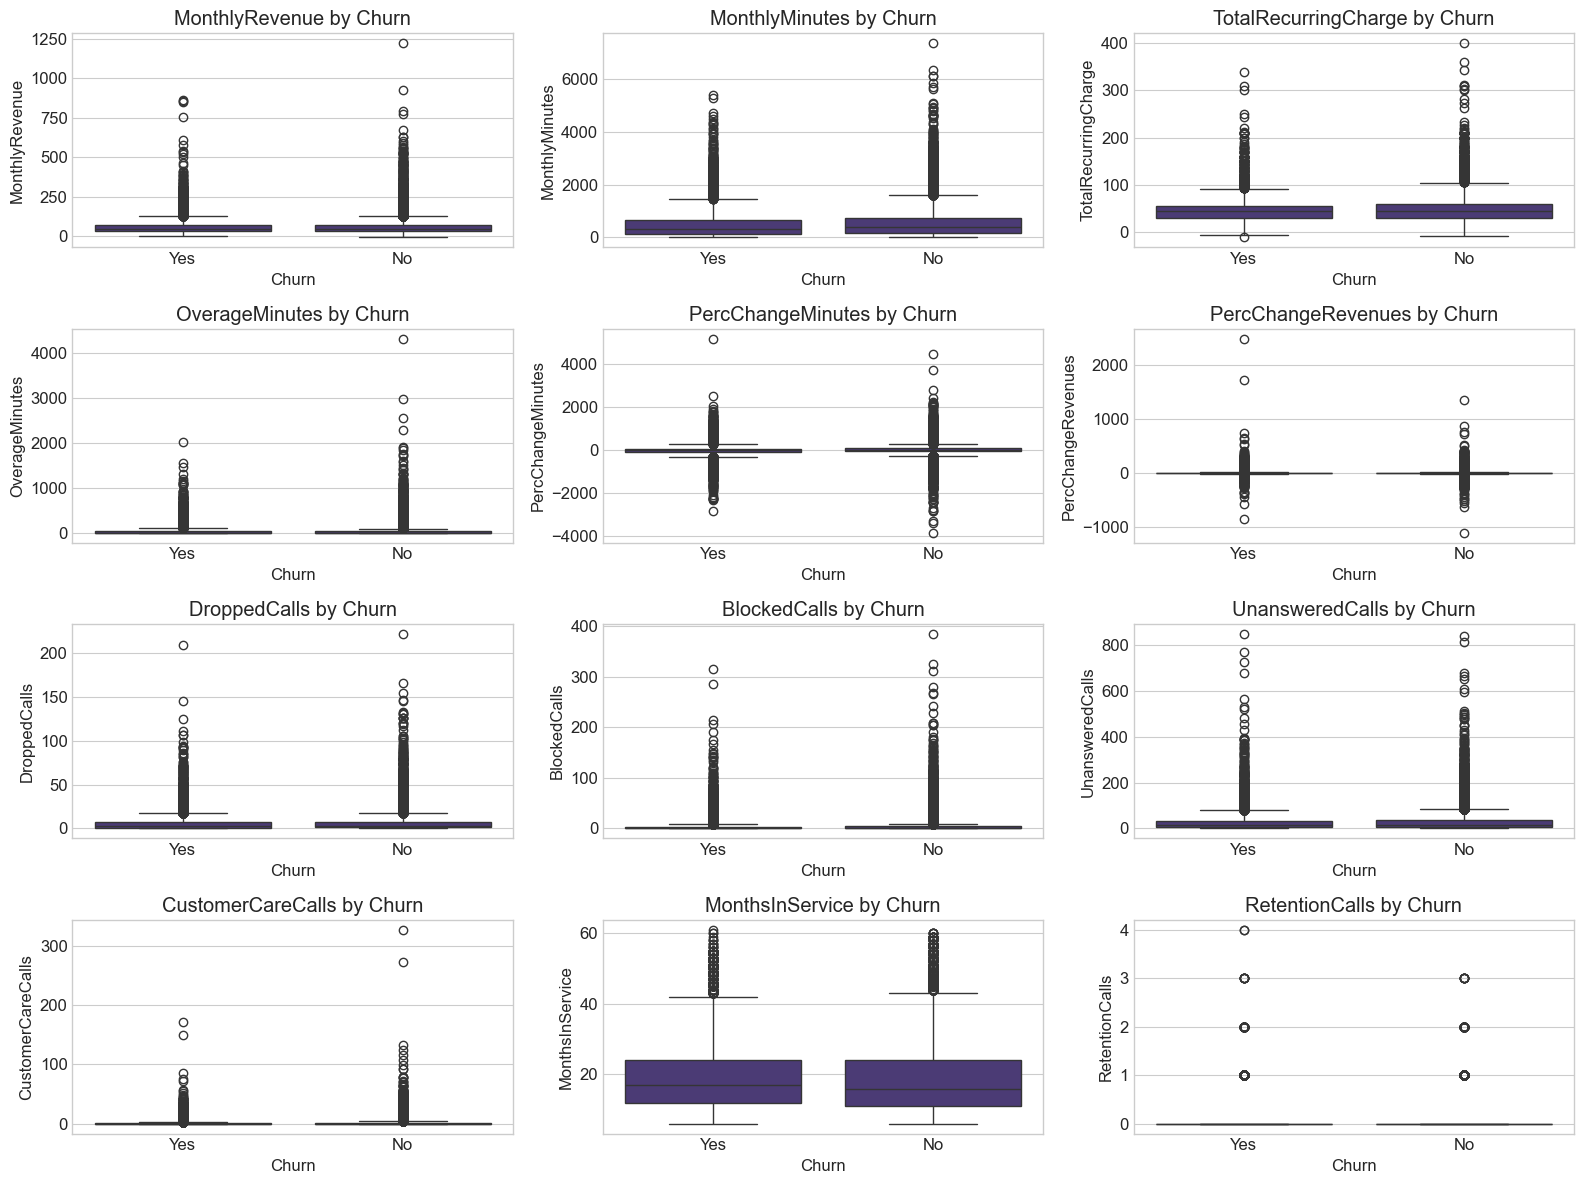

In [23]:
# Plot key numerical features by churn
key_features_for_churn = [
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
    'OverageMinutes', 'PercChangeMinutes', 'PercChangeRevenues',
    'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
    'CustomerCareCalls', 'MonthsInService', 'RetentionCalls'
]

plot_numerical_by_churn(train_data, key_features_for_churn)

### Relationship between categorical features and churn

In [24]:
# Function to plot categorical features by churn
def plot_categorical_by_churn(data, columns, figsize=(16, 12), ncols=2):
    nrows = int(np.ceil(len(columns) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        if i < len(axes):
            # Calculate churn rate by category
            churn_rate = data.groupby(column)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False)
            
            # Plot
            sns.barplot(x=churn_rate.index, y=churn_rate.values, ax=axes[i])
            axes[i].set_title(f'Churn Rate by {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Churn Rate (%)')
            axes[i].tick_params(axis='x', rotation=45)
            
            # Add count labels
            for j, p in enumerate(axes[i].patches):
                category = churn_rate.index[j]
                count = len(data[data[column] == category])
                axes[i].annotate(f"n={count}", 
                            (p.get_x() + p.get_width() / 2., p.get_height() + 1), 
                            ha='center', va='bottom', fontsize=9)
    
    # Hide unused subplots
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

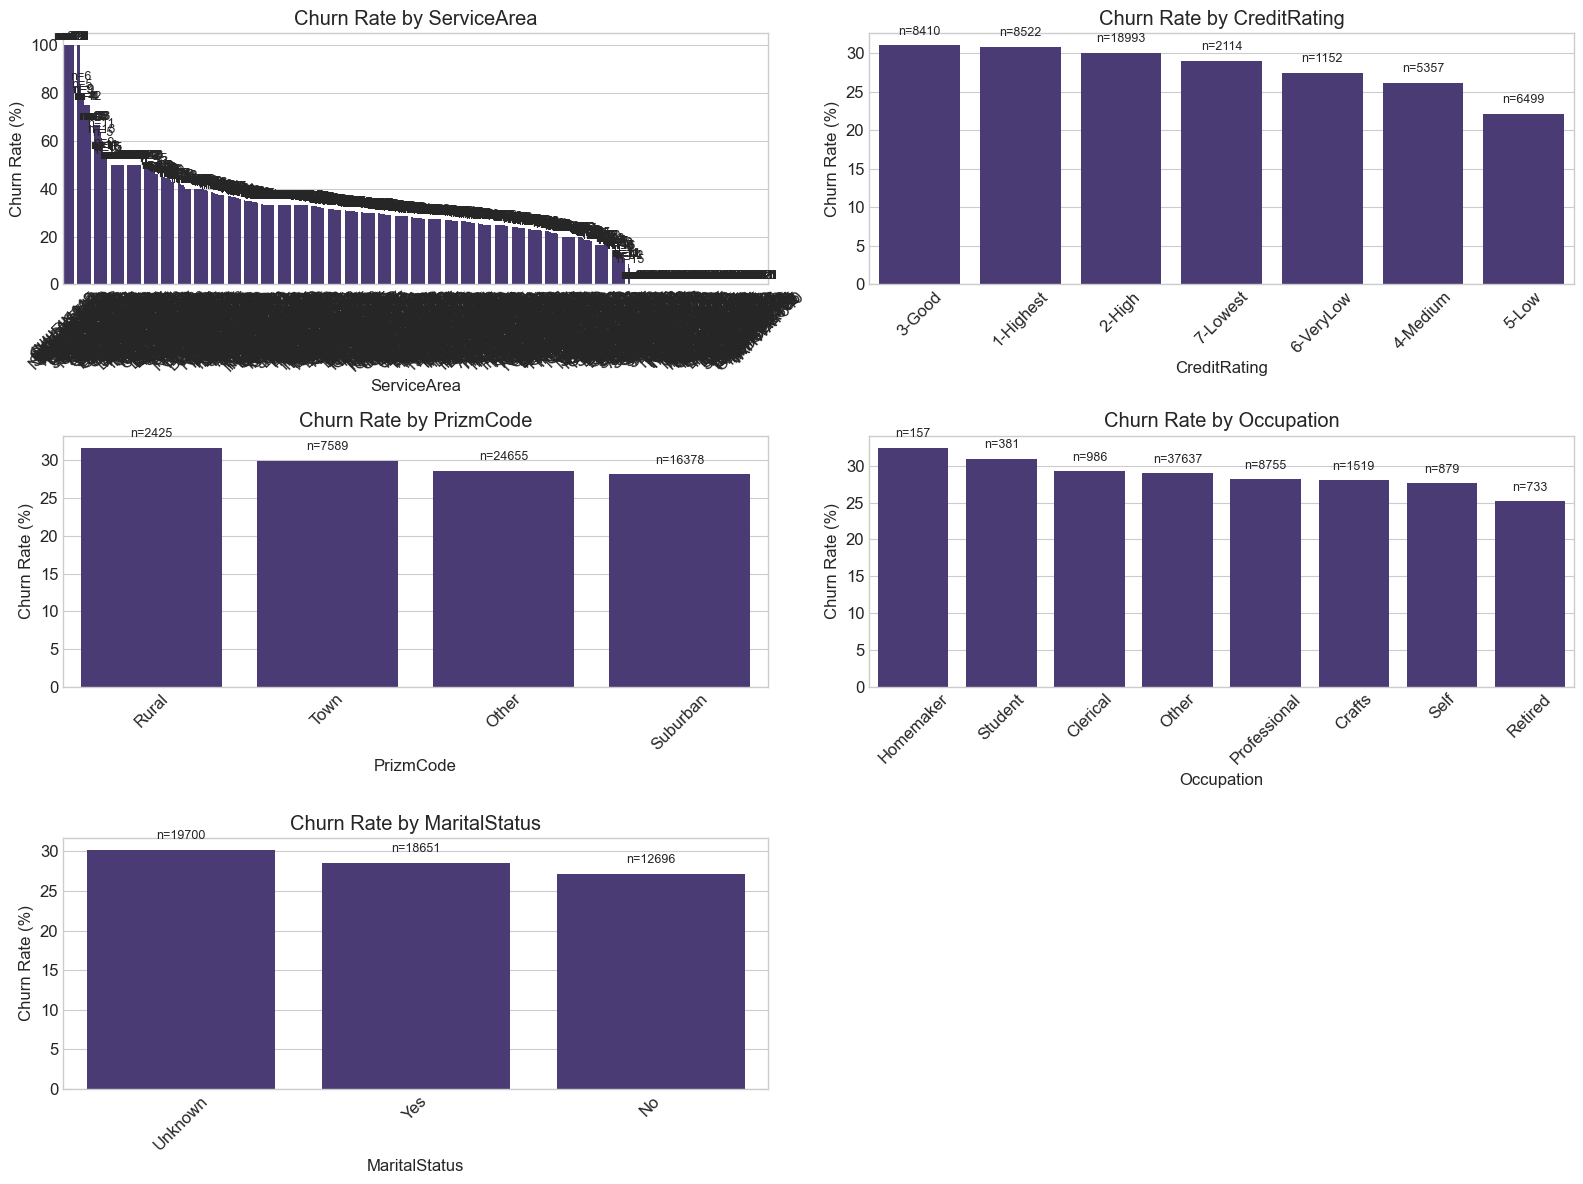

In [25]:
# Plot categorical features by churn
plot_categorical_by_churn(train_data, categorical_columns)

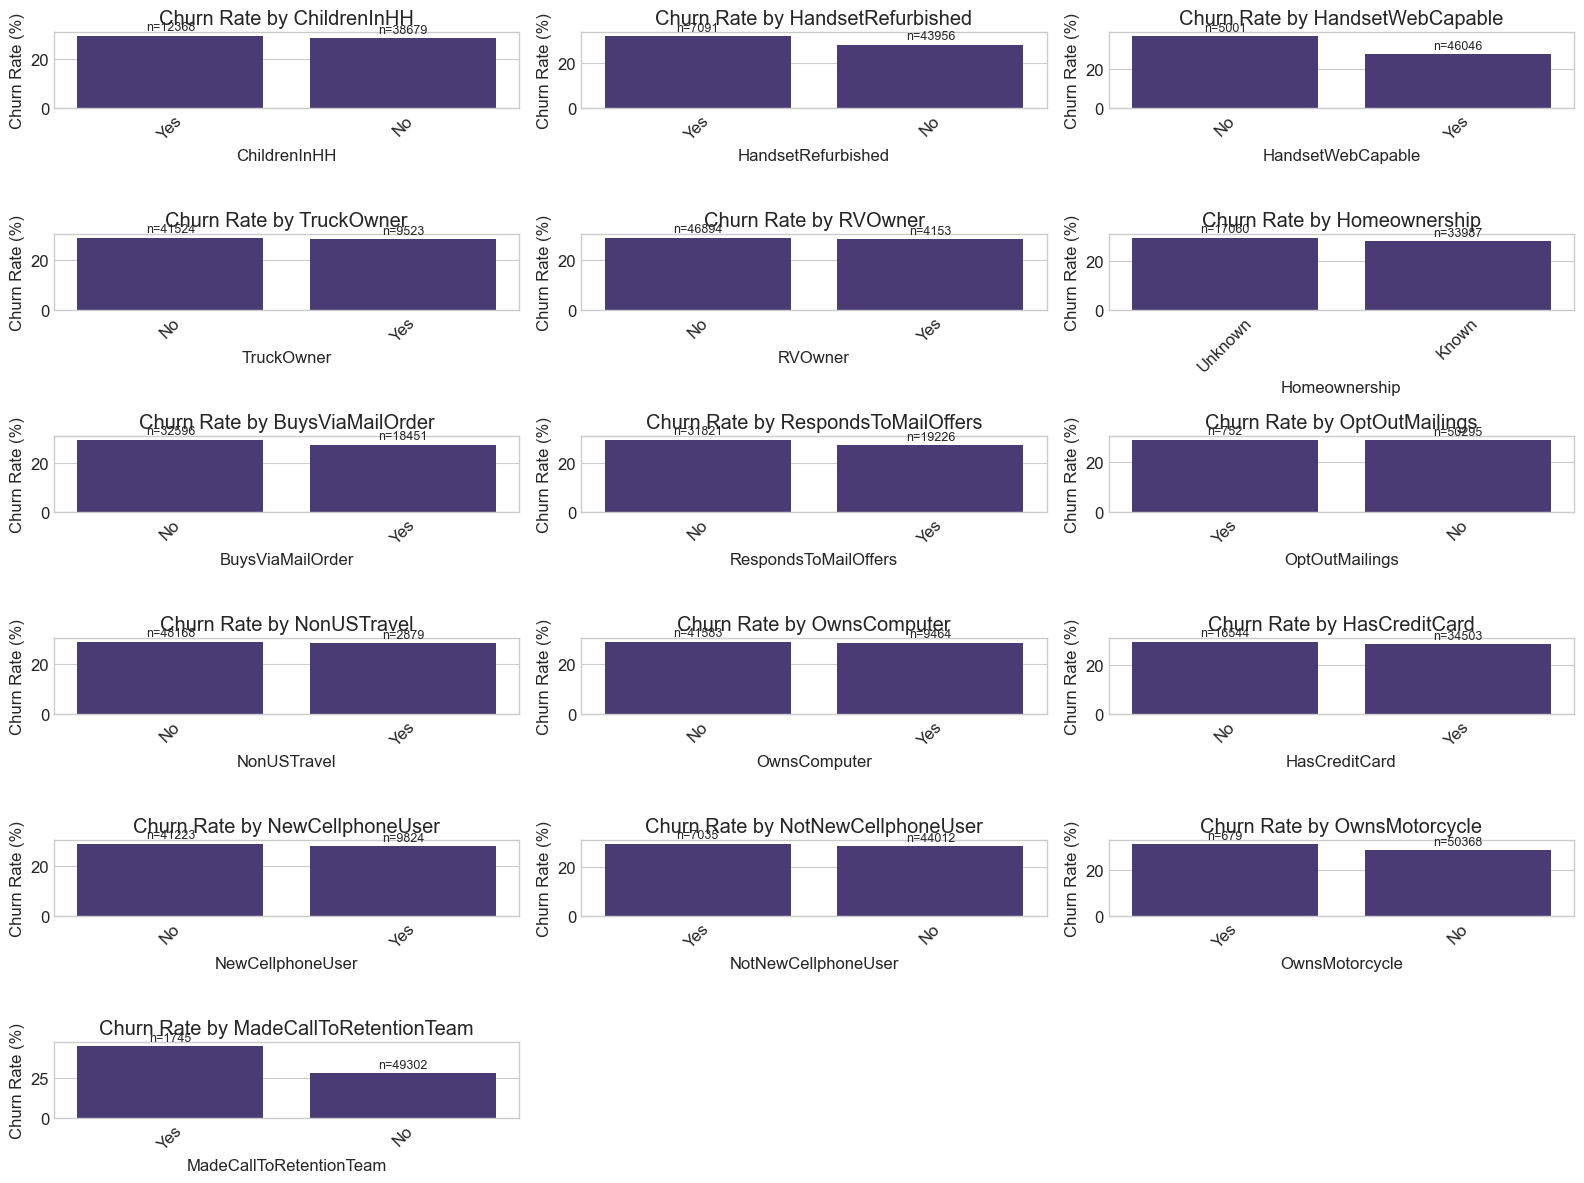

In [26]:
# Plot binary features by churn
plot_categorical_by_churn(train_data, binary_columns, ncols=3)

## 7. Correlation Analysis

Let's analyze correlations between numerical features and with the target variable.

In [27]:
# Create a copy of the data with binary target
train_data_corr = train_data.copy()
train_data_corr['Churn_Binary'] = train_data_corr['Churn'].map({'Yes': 1, 'No': 0})

# Make sure we only include numeric columns
numeric_cols = train_data_corr.select_dtypes(include=['number']).columns
corr_data = train_data_corr[numeric_cols].copy()

# Check for any remaining non-numeric values
print("Checking for non-numeric values in correlation data:")
for col in corr_data.columns:
    non_numeric = corr_data[col].map(lambda x: not np.issubdtype(type(x), np.number)).sum()
    if non_numeric > 0:
        print(f"Column {col} has {non_numeric} non-numeric values")
        # Convert to numeric, coercing errors to NaN
        corr_data[col] = pd.to_numeric(corr_data[col], errors='coerce')

Checking for non-numeric values in correlation data:


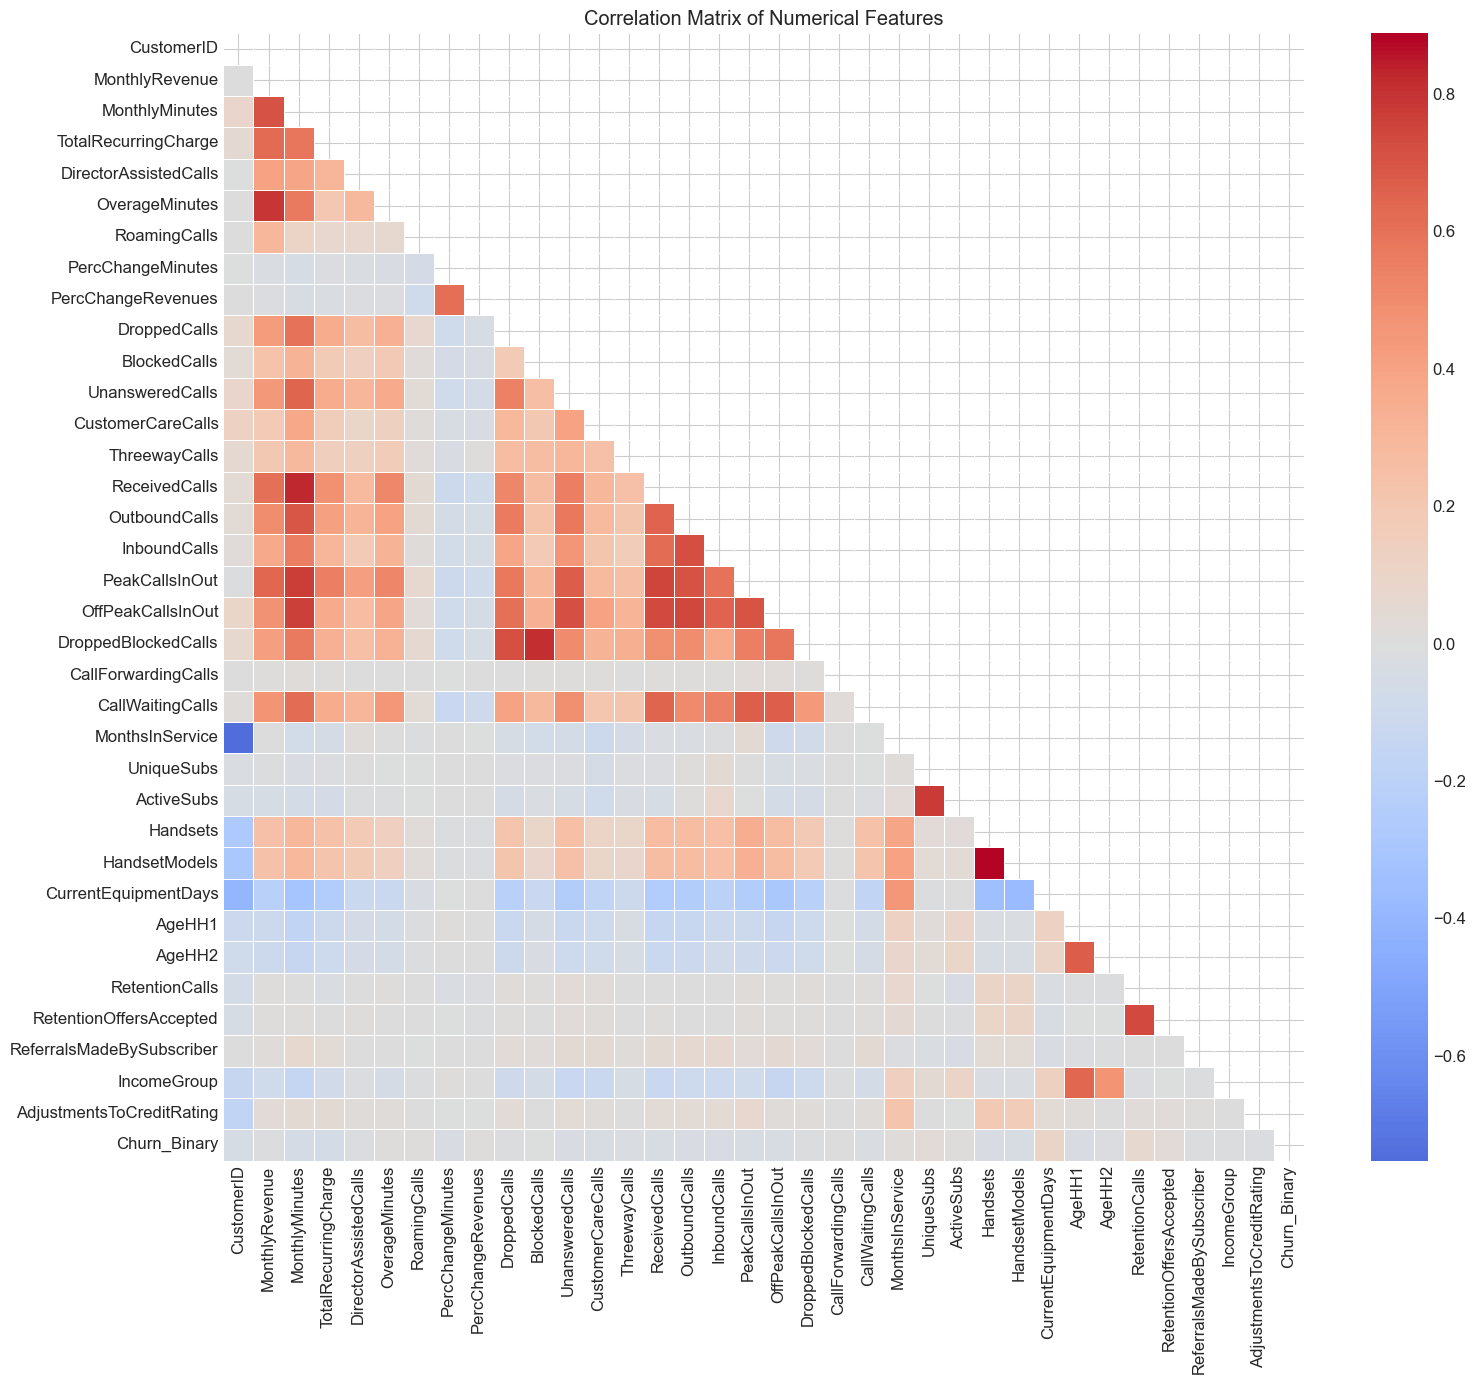

In [28]:
# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [29]:
# Top correlations with Churn
if 'Churn_Binary' in corr_matrix.columns:
    churn_corr = corr_matrix['Churn_Binary'].sort_values(ascending=False)
    print("Top positive correlations with Churn:")
    print(churn_corr.head(10))
    print("\nTop negative correlations with Churn:")
    print(churn_corr.tail(10))

Top positive correlations with Churn:
Churn_Binary              1.00
CurrentEquipmentDays      0.10
RetentionCalls            0.07
RetentionOffersAccepted   0.03
UniqueSubs                0.03
MonthsInService           0.02
OverageMinutes            0.02
ActiveSubs                0.02
PercChangeRevenues        0.01
RoamingCalls              0.01
Name: Churn_Binary, dtype: float64

Top negative correlations with Churn:
PercChangeMinutes      -0.03
InboundCalls           -0.03
CustomerCareCalls      -0.04
ReceivedCalls          -0.04
PeakCallsInOut         -0.04
HandsetModels          -0.04
OffPeakCallsInOut      -0.04
CustomerID             -0.04
MonthlyMinutes         -0.05
TotalRecurringCharge   -0.06
Name: Churn_Binary, dtype: float64


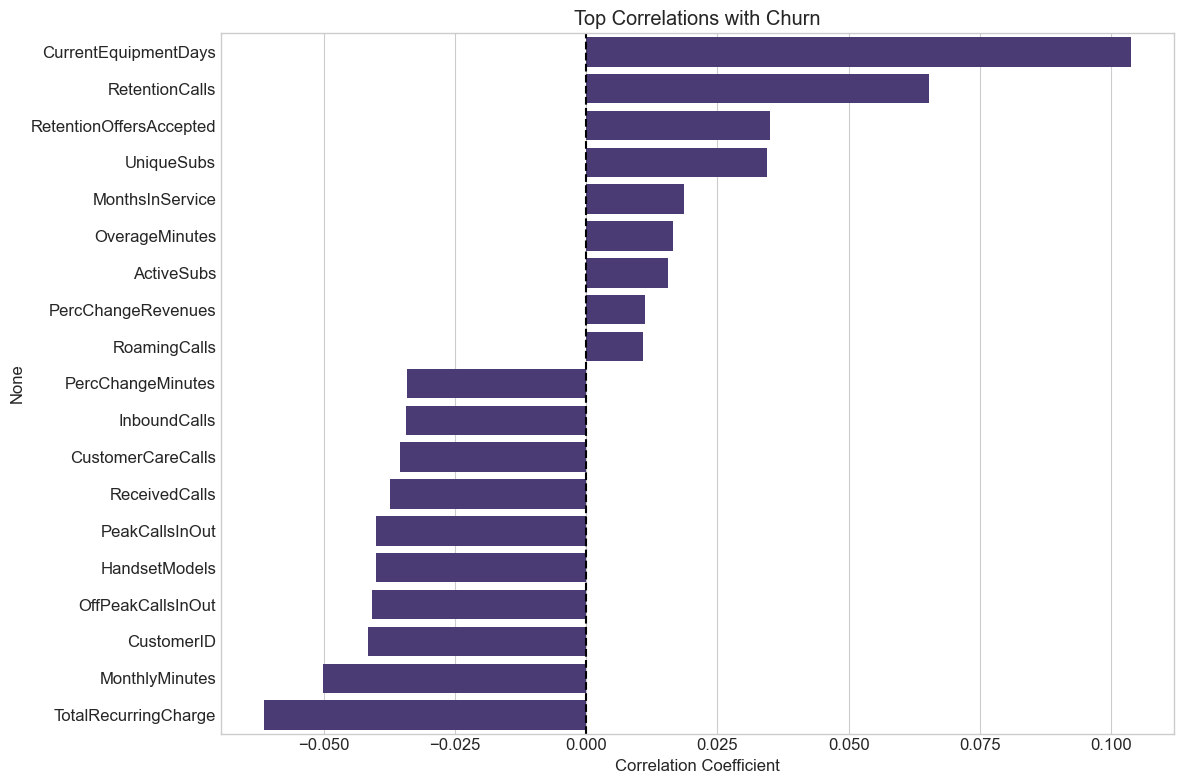

In [30]:
# Plot top correlations with Churn
if 'Churn_Binary' in corr_matrix.columns:
    plt.figure(figsize=(12, 8))
    top_corr = pd.concat([churn_corr.head(10), churn_corr.tail(10)])
    top_corr = top_corr.drop('Churn_Binary')  # Remove self-correlation
    sns.barplot(x=top_corr.values, y=top_corr.index)
    plt.title('Top Correlations with Churn')
    plt.xlabel('Correlation Coefficient')
    plt.axvline(x=0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

### Highly correlated features

Let's identify pairs of highly correlated features.

In [31]:
# Function to get highly correlated pairs
def get_highly_correlated_pairs(corr_matrix, threshold=0.7):
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Apply mask and get pairs with correlation above threshold
    corr_pairs = corr_matrix.mask(mask).stack().reset_index()
    corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    
    # Filter by threshold and sort
    high_corr_pairs = corr_pairs[abs(corr_pairs['Correlation']) > threshold]
    high_corr_pairs = high_corr_pairs.sort_values('Correlation', ascending=False)
    
    return high_corr_pairs

# Get highly correlated pairs
if 'Churn_Binary' in corr_matrix.columns:
    high_corr_pairs = get_highly_correlated_pairs(corr_matrix.drop('Churn_Binary', axis=1).drop('Churn_Binary', axis=0))
else:
    high_corr_pairs = get_highly_correlated_pairs(corr_matrix)
    
high_corr_pairs

,Feature 1,Feature 2,Correlation
350,HandsetModels,Handsets,0.89
93,ReceivedCalls,MonthlyMinutes,0.83
181,DroppedBlockedCalls,BlockedCalls,0.82
11,OverageMinutes,MonthlyRevenue,0.79
299,ActiveSubs,UniqueSubs,0.78
138,PeakCallsInOut,MonthlyMinutes,0.77
155,OffPeakCallsInOut,MonthlyMinutes,0.76
150,PeakCallsInOut,ReceivedCalls,0.75
168,OffPeakCallsInOut,OutboundCalls,0.74
167,OffPeakCallsInOut,ReceivedCalls,0.74


## 8. Outlier Detection

Let's identify outliers in our numerical features.

In [32]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, columns):
    outlier_counts = {}
    
    for column in columns:
        if column in data.columns and pd.api.types.is_numeric_dtype(data[column]):
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            outlier_counts[column] = len(outliers)
    
    return pd.Series(outlier_counts).sort_values(ascending=False)

# Detect outliers in numerical features
outlier_counts = detect_outliers_iqr(train_data, numerical_columns)
outlier_percent = outlier_counts / len(train_data) * 100

# Create summary DataFrame
outlier_summary = pd.DataFrame({
    'Outlier Count': outlier_counts,
    'Outlier Percentage': outlier_percent
})

# Display features with outliers
outlier_summary[outlier_summary['Outlier Count'] > 0].sort_values('Outlier Percentage', ascending=False).head(20)

,Outlier Count,Outlier Percentage
PercChangeRevenues,13221,25.90
RoamingCalls,8835,17.31
CallWaitingCalls,7448,14.59
PercChangeMinutes,6807,13.33
CustomerCareCalls,6721,13.17
OverageMinutes,5842,11.44
DirectorAssistedCalls,5530,10.83
BlockedCalls,5517,10.81
InboundCalls,4973,9.74
ThreewayCalls,4622,9.05


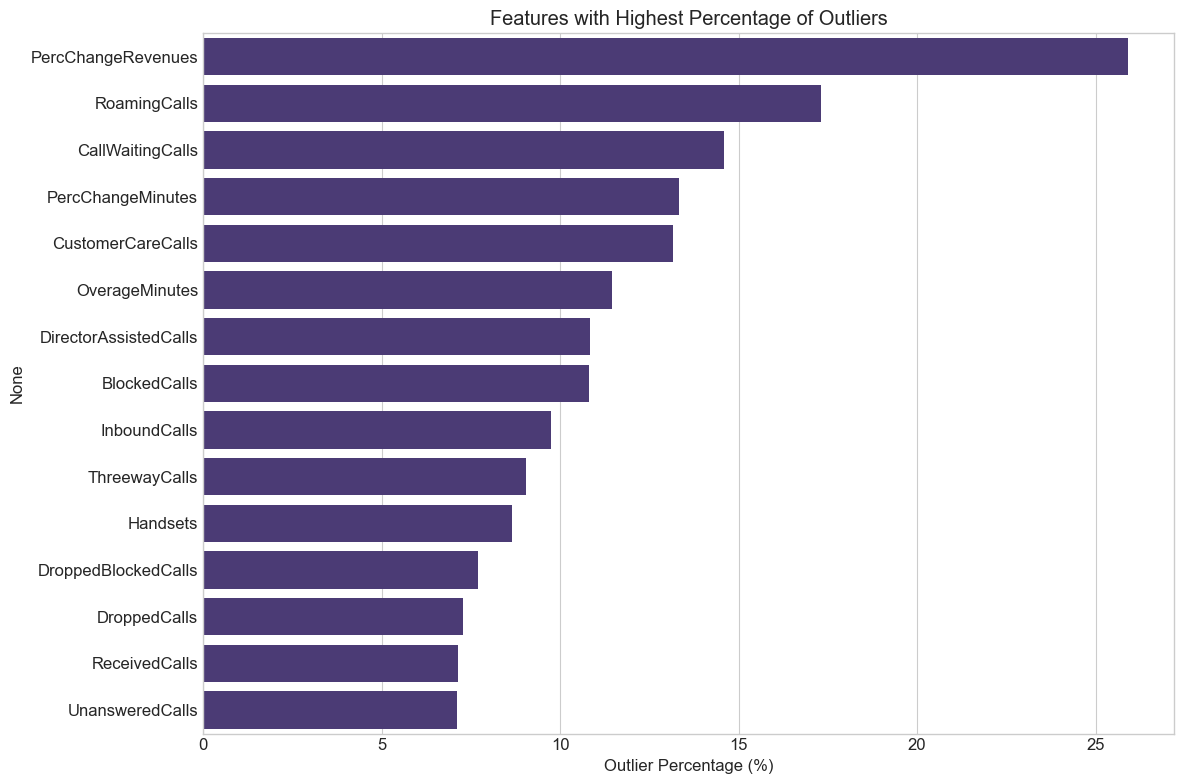

In [33]:
# Plot outlier percentages
plt.figure(figsize=(12, 8))
top_outliers = outlier_summary[outlier_summary['Outlier Count'] > 0].sort_values('Outlier Percentage', ascending=False).head(15)
sns.barplot(x=top_outliers['Outlier Percentage'], y=top_outliers.index)
plt.title('Features with Highest Percentage of Outliers')
plt.xlabel('Outlier Percentage (%)')
plt.tight_layout()
plt.show()

## 9. Feature Importance Analysis

Let's perform a preliminary feature importance analysis using a simple model.

In [34]:
# Prepare data for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Create a copy of the data
model_data = train_data.copy()

# Encode target variable
model_data['Churn'] = model_data['Churn'].map({'Yes': 1, 'No': 0})

# Check for non-numeric values in numerical columns
for column in numerical_columns:
    if column in model_data.columns:
        # Convert to numeric, coercing errors to NaN
        model_data[column] = pd.to_numeric(model_data[column], errors='coerce')

# Handle missing values in numerical features
numerical_imputer = SimpleImputer(strategy='median')
model_data[numerical_columns] = numerical_imputer.fit_transform(model_data[numerical_columns])

# Encode categorical features
for column in categorical_columns + binary_columns:
    if column in model_data.columns:
        le = LabelEncoder()
        model_data[column] = le.fit_transform(model_data[column].astype(str))

# Scale numerical features
scaler = StandardScaler()
model_data[numerical_columns] = scaler.fit_transform(model_data[numerical_columns])

# Prepare features and target
features = model_data.drop(['CustomerID', 'Churn'], axis=1)
target = model_data['Churn']

In [35]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, target)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top features
feature_importances.head(20)

,Feature,Importance
27,CurrentEquipmentDays,0.06
6,PercChangeMinutes,0.05
1,MonthlyMinutes,0.05
0,MonthlyRevenue,0.04
7,PercChangeRevenues,0.04
21,MonthsInService,0.04
24,ServiceArea,0.04
16,PeakCallsInOut,0.04
17,OffPeakCallsInOut,0.04
13,ReceivedCalls,0.04


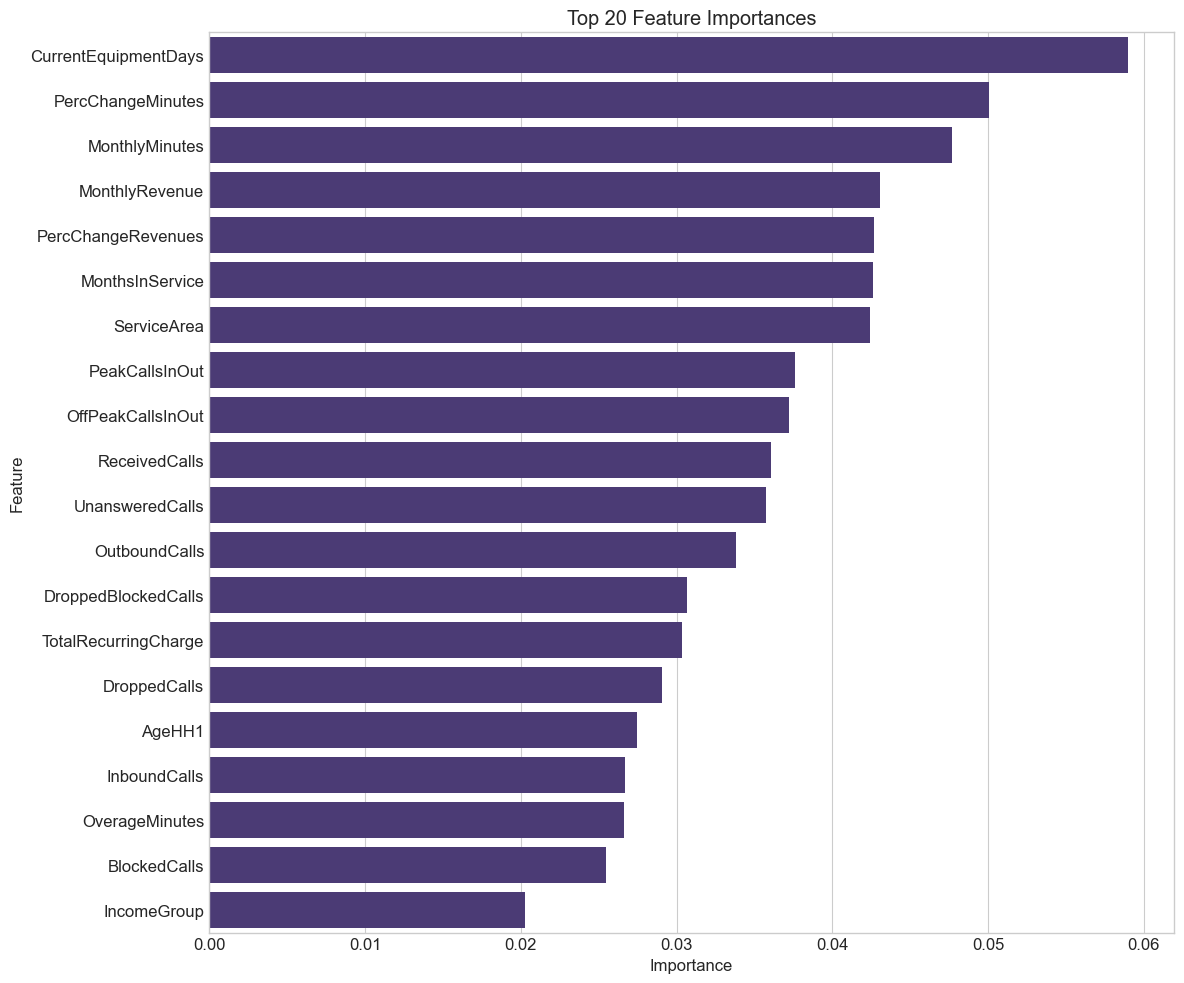

In [36]:
# Plot feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

## 10. Conclusions and Next Steps

### Key Findings

1. **Target Variable Distribution:**
   - The dataset has an imbalanced distribution of the target variable (Churn).
   - [Add specific percentages based on actual data]

2. **Missing Values:**
   - [Summarize missing value findings]
   - [Mention any patterns in missing data]

3. **Feature Distributions:**
   - Many numerical features have skewed distributions, suggesting the need for transformations.
   - Several features contain outliers that may need special handling.

4. **Correlations:**
   - [Highlight key correlations with churn]
   - [Mention highly correlated feature pairs that might cause multicollinearity]

5. **Feature Importance:**
   - [List top features identified by the Random Forest model]
   - These features should be given special attention in the feature engineering phase.

### Next Steps

1. **Data Preprocessing:**
   - Handle missing values using appropriate imputation techniques.
   - Address outliers through capping, removal, or transformation.
   - Apply feature scaling to normalize numerical features.

2. **Feature Engineering:**
   - Create interaction features between key variables.
   - Develop ratio features (e.g., revenue per minute).
   - Generate aggregated features for call patterns.
   - Consider dimensionality reduction for highly correlated features.

3. **Model Development:**
   - Implement multiple models (Random Forest, XGBoost, Neural Networks).
   - Address class imbalance through sampling techniques or class weights.
   - Perform hyperparameter optimization.
   - Evaluate models using appropriate metrics (AUC, F1-score, precision, recall).

4. **Model Interpretation:**
   - Use SHAP values to explain model predictions.
   - Identify key factors driving churn.
   - Develop actionable insights for business stakeholders.

The next notebook in this series will focus on feature engineering based on the insights gained from this exploratory analysis.